# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

In [3]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : luderitz
Processing Record 2 of Set 1 : sur
Processing Record 3 of Set 1 : ahipara
Processing Record 4 of Set 1 : pimenta bueno
Processing Record 5 of Set 1 : nikolskoye
Processing Record 6 of Set 1 : touros
Processing Record 7 of Set 1 : catalina foothills
Processing Record 8 of Set 1 : hermanus
Processing Record 9 of Set 1 : lebu
Processing Record 10 of Set 1 : manta
Processing Record 11 of Set 1 : aras
Processing Record 12 of Set 1 : rikitea
City not found. Skipping...
Processing Record 13 of Set 1 : coite do noia
Processing Record 14 of Set 1 : ushuaia
Processing Record 15 of Set 1 : hobart
Processing Record 16 of Set 1 : vila franca do campo
Processing Record 17 of Set 1 : general roca
Processing Record 18 of Set 1 : hilo
City not found. Skipping...
Processing Record 19 of Set 1 : clyde river
Processing Record 20 of Set 1 : cape town
Processing Record 21 of Set 1 : avarua
Processing Record 22 of

Processing Record 40 of Set 4 : aksarka
Processing Record 41 of Set 4 : juneau
Processing Record 42 of Set 4 : faya
Processing Record 43 of Set 4 : byron bay
Processing Record 44 of Set 4 : srednekolymsk
Processing Record 45 of Set 4 : muroto
Processing Record 46 of Set 4 : leningradskiy
Processing Record 47 of Set 4 : quatre cocos
Processing Record 48 of Set 4 : kaohsiung
Processing Record 49 of Set 4 : vaasa
Processing Record 50 of Set 4 : nalut
Processing Record 0 of Set 5 : talaya
Processing Record 1 of Set 5 : nahariyya
Processing Record 2 of Set 5 : hofn
Processing Record 3 of Set 5 : solton
Processing Record 4 of Set 5 : port hardy
Processing Record 5 of Set 5 : zhigansk
Processing Record 6 of Set 5 : davila
Processing Record 7 of Set 5 : coihaique
Processing Record 8 of Set 5 : lady frere
Processing Record 9 of Set 5 : bichura
Processing Record 10 of Set 5 : sisimiut
Processing Record 11 of Set 5 : castro
Processing Record 12 of Set 5 : aykhal
Processing Record 13 of Set 5 : ba

Processing Record 24 of Set 8 : lac du bonnet
City not found. Skipping...
Processing Record 25 of Set 8 : marquette
Processing Record 26 of Set 8 : seoul
Processing Record 27 of Set 8 : telimele
Processing Record 28 of Set 8 : tacoronte
Processing Record 29 of Set 8 : shimoda
Processing Record 30 of Set 8 : venice
Processing Record 31 of Set 8 : rio gallegos
Processing Record 32 of Set 8 : guerrero negro
Processing Record 33 of Set 8 : nicoya
Processing Record 34 of Set 8 : kenora
Processing Record 35 of Set 8 : maraa
Processing Record 36 of Set 8 : poso
Processing Record 37 of Set 8 : brownsville
Processing Record 38 of Set 8 : cam ranh
Processing Record 39 of Set 8 : alyangula
Processing Record 40 of Set 8 : la asuncion
Processing Record 41 of Set 8 : lima
Processing Record 42 of Set 8 : tsaritsani
Processing Record 43 of Set 8 : dudinka
Processing Record 44 of Set 8 : kasaragod
City not found. Skipping...
Processing Record 45 of Set 8 : san jeronimo
Processing Record 46 of Set 8 : a

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a panda data frame using data retrieved
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

In [6]:
# Count data
weather_dict.count()

City          561
Cloudiness    561
Country       561
Date          561
Humidity      561
Lat           561
Lng           561
Max Temp      561
Wind Speed    561
dtype: int64

In [11]:
# Display the Data Frame
weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Lüderitz,0,NA,1601721127,56,-26.65,15.16,64.53,14.32
1,Sur,0,OM,1601721127,38,22.57,59.53,90.90,7.87
2,Ahipara,4,NZ,1601721107,82,-35.17,173.17,51.91,2.77
3,Pimenta Bueno,65,BR,1601721128,84,-11.67,-61.19,74.25,1.34
4,Nikolskoye,52,RU,1601721047,62,59.70,30.79,63.00,13.42
...,...,...,...,...,...,...,...,...,...
556,Yokadouma,96,CM,1601721283,68,3.52,15.05,83.82,1.74
557,Adré,0,TD,1601721283,37,13.47,22.20,90.27,6.38
558,Mumbai,75,IN,1601721056,79,19.01,72.85,87.80,11.41
559,Bandrele,24,YT,1601721284,66,-12.91,45.19,86.00,6.93


In [12]:
# Save city data into a csv file
weather_dict.to_csv("../output_data/cities.csv", index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

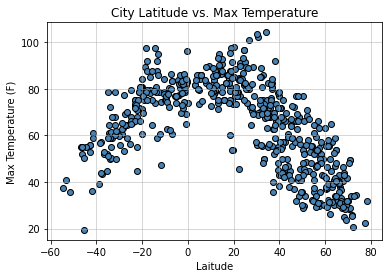

In [20]:

# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

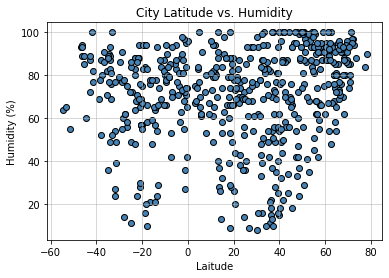

In [19]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

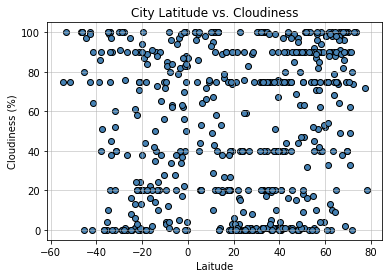

In [18]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

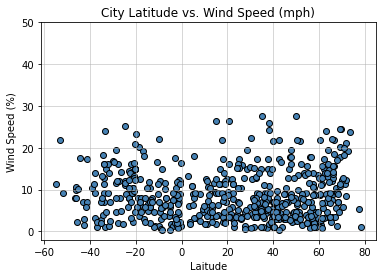

In [17]:

# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [24]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

In [25]:
# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.82


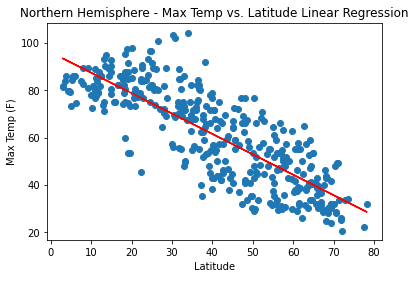

In [26]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.73


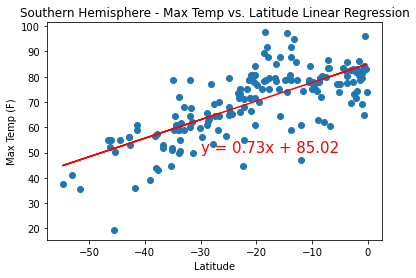

In [27]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.27


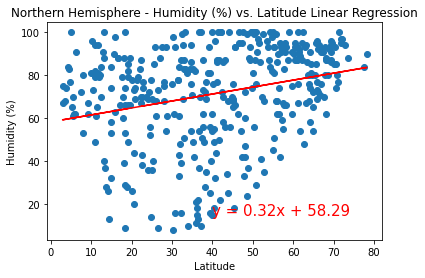

In [28]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.03


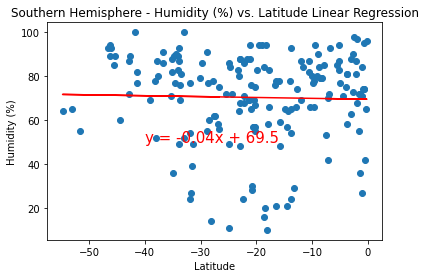

In [29]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.24


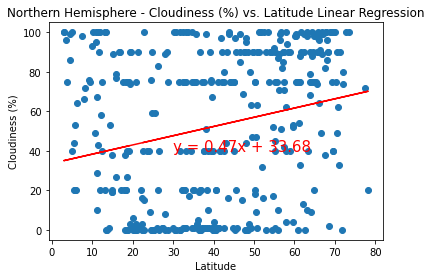

In [30]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.1


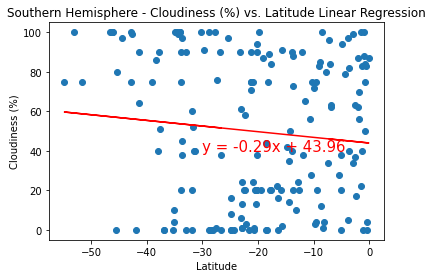

In [31]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.17


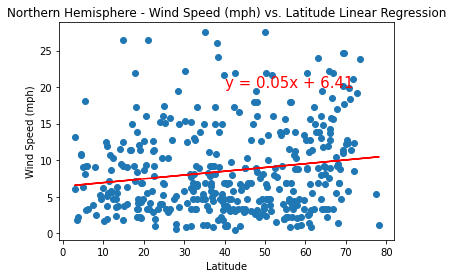

In [32]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.21


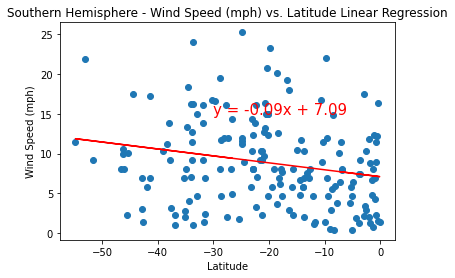

In [33]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")